In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from RNG import random

#generate 1000 random numbers uniformly distributed between 0 and 1, both with numpy and with RNG
N=1000
#numpy random
np.random.seed(0)
rand = np.random.uniform(0,1,N)

#RNG random
rng = random(0)
myrand = rng.uniform (size=N)


# Uniform distribution in (0,1)

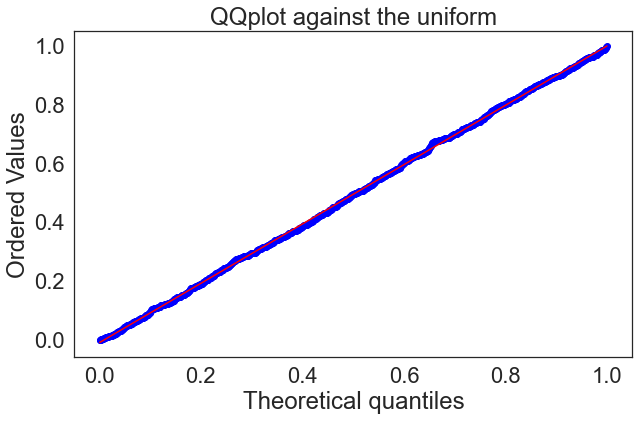

In [3]:
# QQplot against the uniform distribution in (0, 1), showing a perfect match.
sns.set_theme(style='white',palette='Dark2',font_scale=2)

import pylab 
import scipy.stats as stats
fig,ax=plt.subplots( figsize=(10,6))
stats.probplot(myrand, dist="uniform", plot=pylab)
ax.set_title('QQplot against the uniform')
fig.savefig('results/QQplot.pdf', bbox_inches='tight')

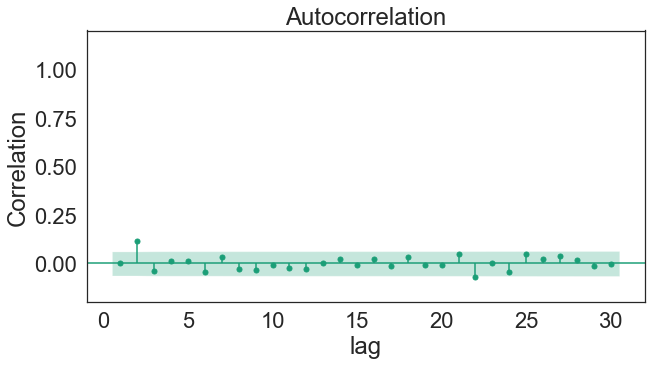

In [4]:
#auto correlation plot

fig,ax=plt.subplots(figsize=(10,5))
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(rand, lags=30, ax=ax,zero=False)
ax.set_xlabel("lag")
ax.set_ylabel("Correlation")
ax.set_ylim(-0.2,1.2)
fig.savefig('results/autocorrelation.pdf', bbox_inches='tight')


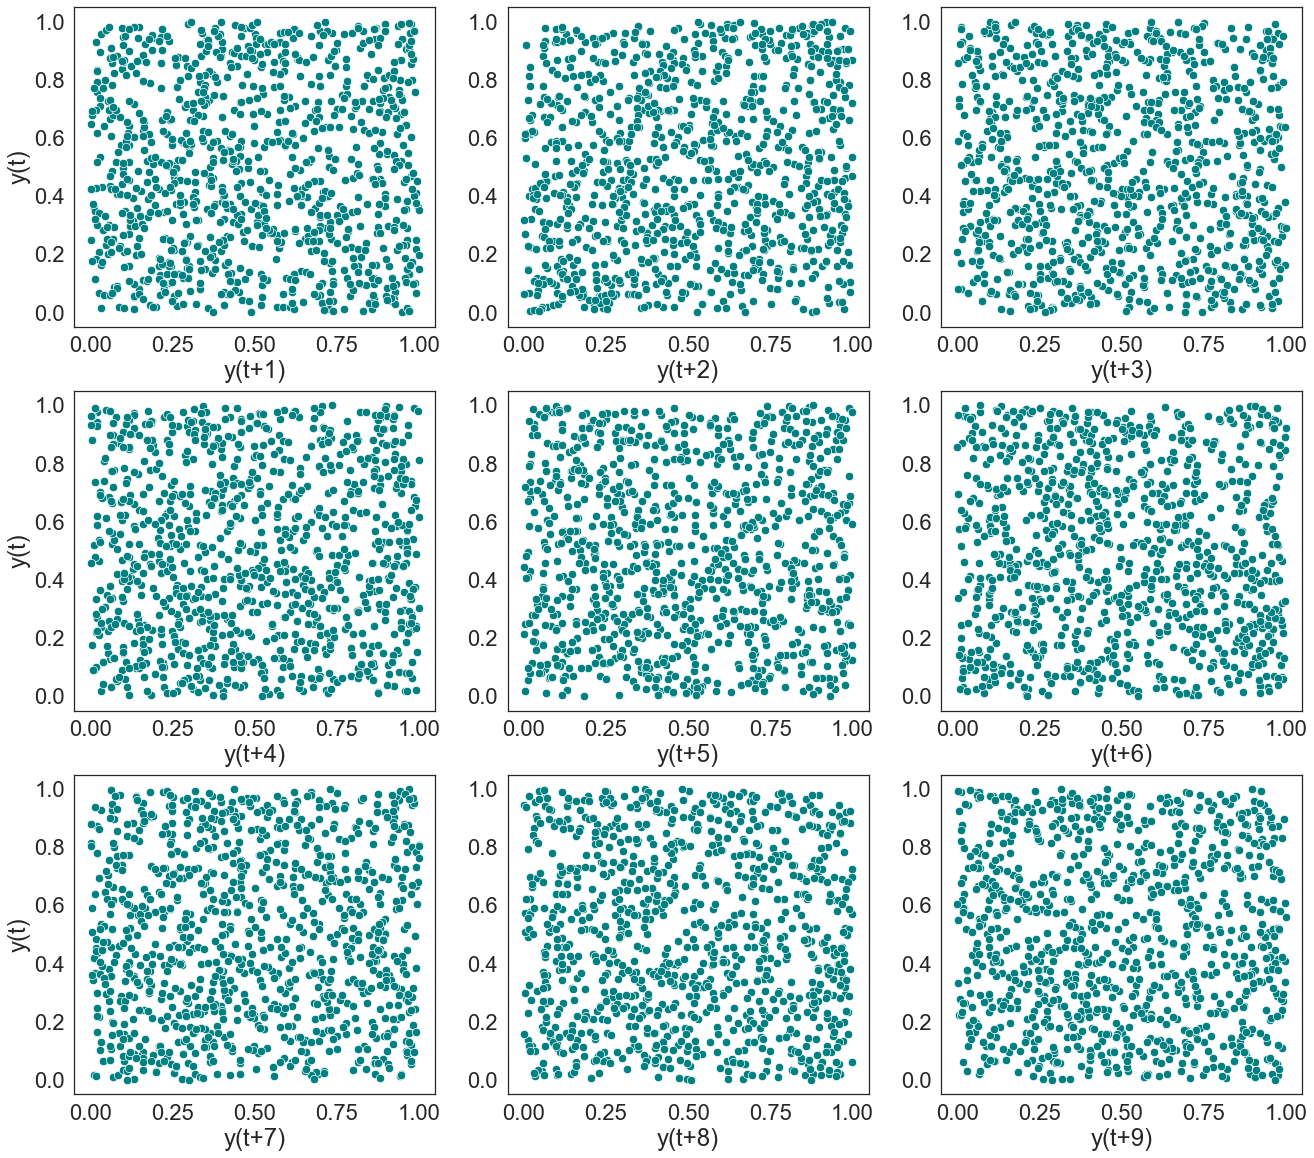

In [5]:
# lag plot of the random numbers

df = pd.DataFrame(np.zeros((len(rand),10)), columns=['rand',*['lag_{}'.format(i) for i in range(1,10)]])
df.loc[:, 'rand'] = rand
for i in range(1,10):
    df.loc[:, 'lag_{}'.format(i)] = df['rand'].shift(periods=i)
df = df.dropna()
df.index = np.arange(len(df))

fig,ax=plt.subplots(3,3,figsize=(22,20))
sns.set_theme(style='white',palette='Dark2',font_scale=2)

for i in range(9):
    sns.scatterplot(y='rand', x='lag_{}'.format(i+1), data=df, ax=ax[i//3,i%3], color='teal', s=70)
    ax[i//3,i%3].set_xlabel("y(t+{})".format(i+1))
    if i%3==0:
        ax[i//3,i%3].set_ylabel("y(t)")
    else: ax[i//3,i%3].set_ylabel("")
fig.savefig('results/lag_plots.pdf', bbox_inches='tight')


# show periodicity in RNG 

In [61]:
def widespread (inf=0, sup=1, nit=1, size=1, a=16807 , m=2**31-1, seed=1):
    def widespread (inf, sup, a, m, n):
        
        # print(a**n*seed)
        # print(n)
        from decimal import Decimal
        import decimal

        decimal.getcontext().prec=10000
        rand = (Decimal(a**n)*Decimal(seed))%Decimal(m)/Decimal(m)
        return rand

    size = int(size)
    nit = 0
    rand = np.zeros(size)
    for i in range(size):
        rand[i] = inf + (sup-inf)*widespread(inf,sup,a,m,nit)
        nit+=1
    return rand

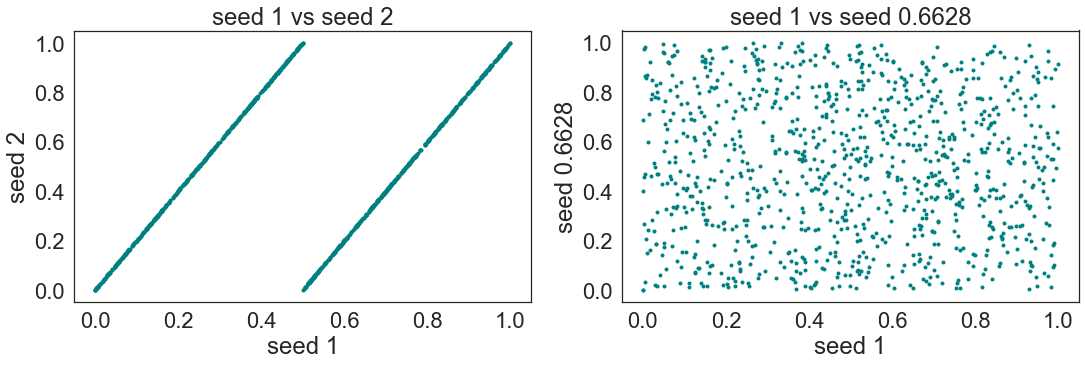

In [65]:
N=1000

seed1 = widespread(size=N, seed=1)
seed2 = widespread(size=N, seed=2)
seedn = widespread(size=N, seed=seed1[-1])

fig, ax = plt.subplots(1,2,figsize=(18,5))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
sns.lineplot(x=seed1, y=seed2, color='teal', ax=ax[0], lw=0, marker='o', markersize=4, markeredgewidth=0)
sns.lineplot(x=seed1, y=seedn, color='teal', ax=ax[1], lw=0, marker='o', markersize=4, markeredgewidth=0)
ax[0].set_title("seed 1 vs seed 2")
ax[1].set_title("seed 1 vs seed 0.6628")
ax[0].set_xlabel("seed 1")
ax[1].set_xlabel("seed 1")
ax[0].set_ylabel("seed 2")
ax[1].set_ylabel("seed 0.6628")
fig.savefig('results/seed_comparison.pdf', bbox_inches='tight')

# accept reject

In [96]:
def f (x, a):
    if x < a or x > a: return 0
    else: return (np.sin(x)/x)**2

def distr(N, inf, sup, a):
    bound_f_n = 1
    rand = []
    y = np.random.uniform(inf,sup)
    u = np.random.uniform(0,bound_f_n)
    print(y,u)
    # print(u, f(y,a))
    while u>f(y,a):
        rand.append(y)
        print(u, f(y,a))
        print(y,u)
        y = np.random.uniform(inf,sup)
        u = np.random.uniform(0,bound_f_n)
    return rand


In [97]:
N = 2000
rand = distr(N, -10, 10, a=10)
print(len(rand))
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(rand, bins=100, color='teal', alpha=0.5)

9.737008510212455 0.9118622884902035
0.9118622884902035 0
9.737008510212455 0.9118622884902035
0.18057234557625323 0
0.7622256116826609 0.18057234557625323
0.408603615331268 0
-6.176644340583453 0.408603615331268
0.68794933928416 0
7.383054300857829 0.68794933928416
0.9552316965333595 0
-3.6361669591690715 0.9552316965333595
0.21283029770762263 0
0.99196046459525 0.21283029770762263
0.16447761652319293 0
0.2095987365415155 0.16447761652319293
0.9234388013650692 0
1.4933635019586244 0.9234388013650692
0.6784469697792876 0
5.754322112324953 0.6784469697792876
0.4250234218635479 0
-3.5732783655338025 0.4250234218635479
0.09821922130033445 0
6.02079107807263 0.09821922130033445
0.8685591386392087 0
-3.7900976987996193 0.8685591386392087
0.6523127134731276 0
5.662803720570599 0.6523127134731276
0.17076762327695982 0
-6.33574007830306 0.17076762327695982
0.3060693978867629 0
-6.290905520252084 0.3060693978867629
0.29325994961741586 0
-1.5266622180755736 0.29325994961741586
0.6002372030734885

KeyboardInterrupt: 

In [84]:
rand

[]